# API para la generación de la declaración

## 0. Carga de Librerias

In [159]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import base64
from PIL import Image #Libreria para el manejod e imagenes
import io
from selenium.webdriver.support.ui import Select
import selenium.webdriver.support.ui as ui
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.select import Select
import time
from tqdm import tqdm_notebook as tqdm
from os import listdir, remove
from os.path import isfile, join
import pathlib
import wget

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from selenium.webdriver.support import expected_conditions as EC

import warnings
warnings.filterwarnings("ignore")
max_attempts=6

Populating the interactive namespace from numpy and matplotlib


## 1. Funciones

In [2]:
#lookuptag

#Descripción General: Funcion para buscar un texto específico en etiquetas similares
#Recibe: Lista de elementos (list_elements) que puede venir de un driver.find_elements...
#Recibe: Texto para comparar (selected_string) que debe ser igual al texto que se esta buscando
#Recibe: Despligue (verbose) para ver todos los elementos de la lista. False por default
#Regresa: Elemento seleccionado o en caso de no encontrar nada None

def lookuptag(list_elements,selected_string,verbose=False):
    if verbose == True:
        for i,e in enumerate(list_elements):
            print(i,":", e.text)
    else:
        pass
    
    for i,e in enumerate(list_elements):
        if e.text == selected_string:
            return e
        else:
            pass
    return None

In [3]:
#loadok

#Descripcion General: Funcion para asegurar la carga de una página despues de una secuencia
#Recibe: elemento de Selenium
#Recibe: tiempo en segundos de cada refrescado (refresh)
#Recibe: Maximo número de intentos para varificar que el elemento se cargo (max_tries)
#Recibe: Una etiqueta para identificar el elemento de prueba (stage) por default ""
#Recibe: Despliegue (verbose) para verificar el estado de la validación
#Regresa: None

def loadok(element, refresh=1, max_tries=3, stage="",verbose=True):
    loaded=False
    tries=0
    
    while 1:
        try:
            element
            loaded=True
            if verbose == True:
                return print(stage+"loaded [ok]")
            else:
                return None
        except:
            tries = tries + 1
            loaded=False
            time.sleep(refresh*tries)
            
            if tries >= max_tries:
                if verbose == True:
                    return print("Número de intentos superado. La página no ha cargado correctamente")
                else:
                    return None
    
    

In [4]:
#error_captcha

#Descripcion General: Verifica si no se lanza la ventana de error de captcha
#Recibe: Nada
#Regresa: Verdader si la ventana de error se muestra, Falso si no hay error
def error_captcha():
    try:
        list_error_captcha=driver.find_elements_by_tag_name('div')
        error_captcha=lookuptag(list_error_captcha,' Captcha no válido')
        return True
    except:
         return False
        

In [5]:
#En caso de problemas de conexion sale un menu emergente que se puede buscar entre cada cambio de pagina
def ventana_emergente_conexion():
    try:
        button_elements=driver.find_elements_by_tag_name('button')
        btn_problemas=lookuptag(button_elements,'Cerrar')
        btn_problemas.click()
    except:
        pass

In [6]:
def ventana_emergente_nueva_forma():
    try:
        btn_iniciar_nueva_forma=driver.find_element_by_id('MainContent_wucDeclaracionesTemporales_Btn_NuevaDeclaTemporal')
        btn_iniciar_nueva_forma.click()
    except:
        try:
            btn_iniciar_nueva_forma=driver.find_element_by_id('MainContent_wucDeclaracionesTemporales_Btn_ReemplazarDeclaTemporal')
            btn_iniciar_nueva_forma.click()
        except:
            pass

In [11]:
def focus(driver):
    loaded=False
    wait=1
    while loaded==False:
        try:
            driver.switch_to_window(driver.window_handles[0])
            loaded=True
        except:
            time.sleep(wait)
            wait+=1
            if wait==max_attempts:
                print("Error en carga de pagina")

## 2. Ingreso de Valores para la declarion

In [ ]:
#Carga de variables pars la declaracion
ingresos='0'
gastos='0'
anterior='0'
retenido='0'

#Ingreso de valores IVA
actividades_gravadas_16='0'
actividades_gravadas_0='0'
actividades_excentas='0'
iva_acreditable_del_periodo='0'
iva_retenido='0'


## 3. Login en página de declaraciones del SAT

loaded [ok]


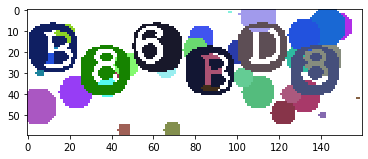

Ingresa el Captcha:B86BD8
Waiting in seleccion pestaña Mi Cotablidad...  2
Waiting in Ingreso Periodo Declaracion...  2
Waiting in Checkboxes...  2
Waiting...  2
Waitingin in Ingreso ISR...  2
Waitingin in Ingreso ISR...  3
Waiting in Ingreso ISR data...  2
Waiting in Ingreso IVA...  2
Waiting in Ingreso IVA...  3
Waiting in Ingreso IVA...  4
Waiting in Vista Previa...  2
Waiting in Vista Previa...  3
Waiting in Vista Previa...  4


"\nloaded=False\nwait=1\nwhile loaded==False:\n    try:\n        btn_vistaprevia=driver.find_element_by_xpath('/html/body/div/div[2]/div/div/div/div[1]/form/div[1]/div[1]/div/div[1]/div[5]/div/a[2]/strong')\n        btn_vistaprevia.click()\n        \n        #Guardar comprobante\n\n    \n    except:\n        focus(driver)\n        loaded=False\n        time.sleep(wait)\n        wait=wait+1\n        if wait==max_attempts:\n            break\n"

In [204]:
load =False
while load==False:
    try:
        #Deteccion de la raiz de los archivos
        directorio=pathlib.Path().absolute()
        filespath=str(directorio)+'/temp'

        #Seleccion de carpeta temporal para descarga de archivow
        chrome_options = webdriver.ChromeOptions()
        prefs = {'download.default_directory' : filespath, 
                 "download.prompt_for_download": False,
                 "download.directory_upgrade": True,
                 "plugins.always_open_pdf_externally": True,
                 "plugins.plugins_list": [{"enabled": False, "name": "Chrome PDF Viewer"}], # Disable Chrome's PDF Viewer
                 "download.extensions_to_open": "applications/pdf"}
        
        chrome_options.add_experimental_option('prefs', prefs)
        options = webdriver.ChromeOptions() 
        options.add_argument("download.default_directory="+filespath)

        
        #Inicializacion de driver de Selenium
        driver = webdriver.Chrome(chrome_options=chrome_options)

        #Inicializar Navegador y entrar a pagina web
        driver.get("https://ptscdecprov.clouda.sat.gob.mx/")

        #Espera dináminca de la carga del captcha
        loadok(driver.find_elements_by_tag_name("img"))
        time.sleep(2)

        #Obtener Captcha
        images=driver.find_elements_by_tag_name("img")
        captcha = images[1].get_attribute('src')[23:]

        #Integrar Captcha
        image_decoded = base64.b64decode(str(captcha))       
        image = Image.open(io.BytesIO(image_decoded))

        #Mostrar captcha en jupiter notebook
        imgplot = plt.imshow(image)
        plt.show()
        
        load=True
    except:
        driver.close()
        load=False


        
loaded=False
while loaded==False:
    #Enviar Captcha y solicitar rfc, pwd y cap
    #str_rfc=input("Ingresa tu RFC:")
    #str_pwd=input("Ingresa tu contraseña:")
    
    str_rfc='IADA810218HG5'
    str_pwd='DaSa0520'
    str_cap=input("Ingresa el Captcha:")

    #Ingreso de credenciales
    loaded=False
    while loaded==False:
        try:
            rfc = driver.find_element_by_id("rfc")
            rfc.clear()
            rfc.send_keys(str_rfc)

            pwd=driver.find_element_by_id("password")
            pwd.clear()
            pwd.send_keys(str_pwd)

            cap=driver.find_element_by_id("userCaptcha")
            cap.clear()
            cap.send_keys(str_cap)

            btn_Login=driver.find_element_by_id("submit")
            btn_Login.click()



            if error_captcha():
                loaded=False
                time.sleep(1)
                #Obtener Captcha
                images=driver.find_elements_by_tag_name("img")
                captcha = images[1].get_attribute('src')[23:]

                #Integrar Captcha
                image_decoded = base64.b64decode(str(captcha))       
                image = Image.open(io.BytesIO(image_decoded))

                #Mostrar captcha en jupiter notebook
                imgplot = plt.imshow(image)
                plt.show()
            else:
                loaded=True
        except:
            pass

#-----------------------------------Ir a pestaña de Mi contabilidad---------------------------------------------

#Ha tenido problemas en el click al quedarse seleccionado

loaded=False
wait=1
while loaded==False:
    try:
        a_elements=driver.find_elements_by_class_name('ui-menuitem-text')
        btn_Presentacion=lookuptag(a_elements,'Presentación de la declaración')
        btn_Presentacion.click()
        #time.sleep(1)
        a_elements=driver.find_elements_by_class_name('ui-menuitem-text')
        btn_OtrasObligaciones=lookuptag(a_elements,'Mi Contabilidad')
        btn_OtrasObligaciones.click()
        loaded=True
    except:
        loaded=False
        time.sleep(wait)
        wait=wait+1
        focus(driver)
        btn_Presentacion=lookuptag(a_elements,'Consultas')
        btn_Presentacion.click()
        print('Waiting in seleccion pestaña Mi Cotablidad... ',wait)
        if wait==max_attempts:
            break

ventana_emergente_nueva_forma()

#---------------------Ingreso de informacion del periodo de la declaracion----------------------------------

loaded=False
wait=1
while loaded==False:
    try:
        sel_periodicidad = Select(driver.find_element_by_id('MainContent_wucConfigDeclaracion_wucDdlPeriodicidad_ddlCatalogo'))
        sel_periodicidad.select_by_value("M")

        #Selección del mes
        mes= '012' if time.localtime().tm_mon == 1 else ( str('00'+str(time.localtime().tm_mon-1)) if time.localtime().tm_mon<10 else str('0'+str(time.localtime().tm_mon -1)))
        sel_periodo = Select(driver.find_element_by_id('MainContent_wucConfigDeclaracion_wucDdlPeriodoFiscal_ddlCatalogo'))
        sel_periodo.select_by_value(mes)

        btn_siguiente=driver.find_element_by_id('MainContent_btnSiguiente')
        btn_siguiente.click()

        #Boton "+" utilizado en otras obligaciones
        #btn_mas=driver.find_element_by_id('MainContent_wucObligaciones_ImgOtrasOblig')
        #btn_mas.click()
        
        time.sleep(2)
        ventana_emergente_nueva_forma()
        loaded=True
    except:
        time.sleep(wait)
        wait+=1
        print('Waiting in Ingreso Periodo Declaracion... ',wait)
        if wait==max_attempts:
            break

#Selector de checkbox de obligaciones
loaded=False
wait=1
while loaded==False:
    try:
        chb_isr=driver.find_element_by_id('MainContent_wucObligaciones_rptGvObligaciones_gvObligaciones_0_chkObligaciones_0')
        chb_isr.click()

        chb_iva=driver.find_element_by_id('MainContent_wucObligaciones_rptGvObligaciones_gvObligaciones_0_chkObligaciones_1')
        chb_iva.click()

        btn_siguiente=driver.find_element_by_id('MainContent_btnSiguiente')
        btn_siguiente.click()
        loaded=True
    except:
        loaded=False
        time.sleep(wait)
        wait=wait+1
        print('Waiting in Checkboxes... ',wait)
        if wait==max_attempts:
            break

loaded= False
wait=1
while loaded==False:
    try:
        btn_msg=driver.find_element_by_id('MainContent_Btn_EnviarDeclaracionPMS')
        btn_msg.click()
        loaded=True
    except:
        loaded=False
        time.sleep(wait)
        wait=wait+1
        print('Waiting... ',wait)
        if wait==max_attempts:
            break


#Mucho tiempo en pasar al siguiente

#----------------------------------------Ingreso de información en ISR----------------------------------------

#focus()
loaded=False
wait=1
while loaded==False:
    try:
        time.sleep(1)
        o_elements=driver.find_elements_by_tag_name('strong')
        btn_isr=lookuptag(o_elements,'ISR PERSONAS FÍSICAS, ACTIVIDAD EMPRESARIAL Y PROFESIONAL')
        btn_isr.click()
        loaded=True
    except:
        focus(driver)
        loaded=False
        time.sleep(wait)
        wait=wait+1
        print('Waitingin in Ingreso ISR... ',wait)
        if wait==max_attempts+5:
            break

loaded=False
wait=1
while loaded==False:
    try:
        cmb_gastos=driver.find_element_by_id('342textbox8')
        cmb_gastos.clear()
        cmb_gastos.send_keys(gastos)

        cmb_ingresos=driver.find_element_by_id('342textbox5')
        cmb_ingresos.clear()
        cmb_ingresos.send_keys(ingresos)

        cmb_anterior=driver.find_element_by_id('342textbox16')
        cmb_anterior.clear()
        cmb_anterior.send_keys(anterior)

        cmb_retenido=driver.find_element_by_id('342textbox18')
        cmb_retenido.clear()
        cmb_retenido.send_keys(retenido)

        #Seleccion de pestaña de determinaciond e pago
        driver.execute_script("window.scrollTo(0, 0);") #Scroll a la parte de arriba
        li_elements=driver.find_elements_by_tag_name('li')
        tab_detpago=lookuptag(li_elements,'Determinación de pago')
        tab_detpago.click()

        #Extraccion de datos de la Determinacion de Pago
        val_isr_a_cargo = driver.find_element_by_id('342textbox10005').get_attribute('value')
        val_isr_total_de_contribucioes= driver.find_element_by_id('342textbox10009').get_attribute('value')
        val_isr_catidad_a_cargo= driver.find_element_by_id('342textbox100025').get_attribute('value')
        val_isr_cantidad_a_pagar= driver.find_element_by_id('342textbox100030').get_attribute('value')

        #Regreso a pantalla principal
        driver.execute_script("window.scrollTo(0, 0);")
        btn_menuprincipal=driver.find_element_by_id('btnMenuPrincipal')
        btn_menuprincipal.click()
        
        loaded=True
    except:
        focus(driver)
        loaded=False
        time.sleep(wait)
        wait=wait+1
        print('Waiting in Ingreso ISR data... ',wait)
        if wait==max_attempts:
            break
            
#-----------------------------------Ingreso de informacion de IVA---------------------------------------------

loaded=False
wait=1
while loaded==False:
    try:
        o_elements=driver.find_elements_by_id('tituloObligacion')
        btn_iva=lookuptag(o_elements,'IMPUESTO AL VALOR AGREGADO')
        btn_iva.click()
    except:
        focus(driver)
        loaded=False
        time.sleep(wait)
        wait=wait+1
        print('Waiting in Ingreso IVA... ',wait)
        if wait==max_attempts:
            break

loaded=False
wait=1
while loaded==False:
    try:
        cmb_actividades_gravadas_16=driver.find_element_by_id('332textbox4')
        cmb_actividades_gravadas_16.clear()
        cmb_actividades_gravadas_16.send_keys(actividades_gravadas_16)


        cmb_actividades_gravadas_0=driver.find_element_by_id('332textbox5')
        cmb_actividades_gravadas_0.clear()
        cmb_actividades_gravadas_0.send_keys(actividades_gravadas_0)

        cmb_actividades_excentas=driver.find_element_by_id('332textbox6')
        cmb_actividades_excentas.clear()
        cmb_actividades_excentas.send_keys(actividades_excentas)

        cmb_iva_acreditable_del_periodo=driver.find_element_by_id('332textbox8')
        cmb_iva_acreditable_del_periodo.clear()
        cmb_iva_acreditable_del_periodo.send_keys(iva_acreditable_del_periodo)

        cmb_iva_retenido=driver.find_element_by_id('332textbox9')
        cmb_iva_retenido.clear()
        cmb_iva_retenido.send_keys(iva_retenido)

        cmb_actividades_gravadas_16=driver.find_element_by_id('332textbox4')
        cmb_actividades_gravadas_16.clear()
        cmb_actividades_gravadas_16.send_keys(actividades_gravadas_16)

        cmb_otras_a_cargo=Select(driver.find_element_by_id('332select10'))
        cmb_otras_a_cargo.select_by_value('2')#0=Sin Seleccion 1=Si 2=No

        cmb_otras_a_favor=Select(driver.find_element_by_id('332select16'))
        cmb_otras_a_favor.select_by_value('2')#0=Sin Seleccion 1=Si 2=No

        #Seleccion de pestaña de determinaciond e pago IVA
        driver.execute_script("window.scrollTo(0, 0);") #Scroll a la parte de arriba
        li_elements=driver.find_elements_by_tag_name('li')
        tab_detpago=lookuptag(li_elements,'Determinación de pago')
        tab_detpago.click()

        #Extraccion de datos de la Determinacion de Pago del IVA
        val_iva_a_cargo = driver.find_element_by_id('342textbox10005').get_attribute('value')
        val_iva_total_de_contribucioes= driver.find_element_by_id('342textbox10009').get_attribute('value')
        val_iva_catidad_a_cargo= driver.find_element_by_id('342textbox100025').get_attribute('value')
        val_iva_cantidad_a_pagar= driver.find_element_by_id('342textbox100030').get_attribute('value')

        #Regreso a pantalla principal
        driver.execute_script("window.scrollTo(0, 0);")
        #btn_header=driver.find_elements_by_class_name('ui-menuitem-text')
        #btn_x=lookuptag(btn_header,'Consultas')
        #btn_x.click()
        btn_menuprincipal=driver.find_element_by_xpath('/html/body/div/div[2]/div/div/div/div[1]/form/div[1]/div[2]/div[2]/div[2]/div/button[1]')
        btn_menuprincipal.click()
        
        loaded=True
    
    except:
        focus(driver)
        loaded=False
        time.sleep(wait)
        wait=wait+1
        print('Waiting in Ingreso IVA data... ',wait)
        if wait==max_attempts:
            break

#---------------------------------------------Total a Pagar------------------------------------------------------

loaded=False
wait=1
while loaded==False:
    try:
        txt_totalapagar=driver.find_element_by_id('totalPagar')
        txt_totalapagar.text
    except:
        focus(driver)
        loaded=False
        time.sleep(wait)
        wait=wait+1
        print('Waiting in obteniendo Total a Pagar... ',wait)
        if wait==max_attempts:
            break


'''
# ------------------------------------------Vista Previa-------------------------------------------------------
loaded=False
wait=1
while loaded==False:
    try:
        btn_vistaprevia=driver.find_element_by_xpath('/html/body/div/div[2]/div/div/div/div[1]/form/div[1]/div[1]/div/div[1]/div[5]/div/a[1]/strong')
        btn_vistaprevia.click()
        
        #Guardar la vista previa
        #pdf = driver.find_element_by_id('ifrmVistaPrevia')
        #url = pdf.get_attribute('src')
        #wget.download(url, './vistaprevia.pdf')

        btn_cerrarvistaprevia=driver.find_element_by_xpath('/html/body/div[1]/div[2]/div/div/div/div[29]/div/div/div[2]/a/strong')
        btn_cerrarvistaprevia.click()
    
    except:
        focus(driver)
        loaded=False
        time.sleep(wait)
        wait=wait+1
        print('Waiting in Vista Previa... ',wait)
        if wait==max_attempts:
            print('Roto en Vista Previa')
            break
'''


'''
#------------------------------------------Envio de Desclaracion-----------------------------------------------

loaded=False
wait=1
while loaded==False:
    try:
        btn_vistaprevia=driver.find_element_by_xpath('/html/body/div/div[2]/div/div/div/div[1]/form/div[1]/div[1]/div/div[1]/div[5]/div/a[2]/strong')
        btn_vistaprevia.click()
        
        #Guardar comprobante

    
    except:
        focus(driver)
        loaded=False
        time.sleep(wait)
        wait=wait+1
        if wait==max_attempts:
            break
'''
driver.close()
print("Execucion correcta")

In [203]:
driver.close()